<a href="https://colab.research.google.com/github/cderekw4224/dataMeetUpPyForecasting/blob/master/DataAnalytics_AShortDemo_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Short Demo: Capture --> Business Intelligence --> Predictive Analytics (20 minutes)

# Capture

#### Most Voted Feature Films Released 1950-01-01 to 2012-12-31

https://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012    

Import Python packages

In [0]:
import requests
from lxml import html
import csv
import pandas as pd

In [2]:
r = requests.get('http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012')
data = html.fromstring(r.text)

# Xpath

for i in data.xpath("//div[@class='lister-item-content']"):
    title = i.xpath('h3/a/text()') 
    url = i.xpath('h3/a/@href')       
    year = i.xpath('h3/span[2]/text()')   
    length = i.xpath("p[1]/span[3]/text()")
    print(title, url, year, length)   

['The Shawshank Redemption'] ['/title/tt0111161/'] ['(1994)'] ['142 min']
['The Dark Knight'] ['/title/tt0468569/'] ['(2008)'] ['152 min']
['Inception'] ['/title/tt1375666/'] ['(2010)'] ['148 min']
['Fight Club'] ['/title/tt0137523/'] ['(1999)'] ['139 min']
['Pulp Fiction'] ['/title/tt0110912/'] ['(1994)'] ['154 min']
['Forrest Gump'] ['/title/tt0109830/'] ['(1994)'] ['142 min']
['The Lord of the Rings: The Fellowship of the Ring'] ['/title/tt0120737/'] ['(2001)'] ['178 min']
['The Matrix'] ['/title/tt0133093/'] ['(1999)'] ['136 min']
['The Lord of the Rings: The Return of the King'] ['/title/tt0167260/'] ['(2003)'] ['201 min']
['The Godfather'] ['/title/tt0068646/'] ['(1972)'] ['175 min']
['The Dark Knight Rises'] ['/title/tt1345836/'] ['(2012)'] ['164 min']
['The Lord of the Rings: The Two Towers'] ['/title/tt0167261/'] ['(2002)'] ['179 min']
['Se7en'] ['/title/tt0114369/'] ['(1995)'] ['127 min']
['Gladiator'] ['/title/tt0172495/'] ['(2000)'] ['155 min']
['Django Unchained'] ['/title

Now it's your turn! Collect more data (gross)

In [3]:
r = requests.get('http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012')
data = html.fromstring(r.text)

# Xpath

for i in data.xpath("//div[@class='lister-item-content']"):
    title = i.xpath('h3/a/text()')  
    url = i.xpath('h3/a/@href')        
    year = i.xpath('h3/span[2]/text()')   
    length = i.xpath("p[1]/span[3]/text()")
    rating = i.xpath("div/div/strong/text()")
    metascore = i.xpath("div[@class='ratings-bar']/div[3]/span/text()")
    votes = i.xpath("p[@class='sort-num_votes-visible']/span[2]/text()")
    print(title, url, year, length, rating, metascore, votes)       


['The Shawshank Redemption'] ['/title/tt0111161/'] ['(1994)'] ['142 min'] ['9.3'] ['80        '] ['2,089,035']
['The Dark Knight'] ['/title/tt0468569/'] ['(2008)'] ['152 min'] ['9.0'] ['84        '] ['2,055,527']
['Inception'] ['/title/tt1375666/'] ['(2010)'] ['148 min'] ['8.8'] ['74        '] ['1,830,297']
['Fight Club'] ['/title/tt0137523/'] ['(1999)'] ['139 min'] ['8.8'] ['66        '] ['1,670,201']
['Pulp Fiction'] ['/title/tt0110912/'] ['(1994)'] ['154 min'] ['8.9'] ['94        '] ['1,632,907']
['Forrest Gump'] ['/title/tt0109830/'] ['(1994)'] ['142 min'] ['8.8'] ['82        '] ['1,601,904']
['The Lord of the Rings: The Fellowship of the Ring'] ['/title/tt0120737/'] ['(2001)'] ['178 min'] ['8.8'] ['92        '] ['1,503,008']
['The Matrix'] ['/title/tt0133093/'] ['(1999)'] ['136 min'] ['8.7'] ['73        '] ['1,500,183']
['The Lord of the Rings: The Return of the King'] ['/title/tt0167260/'] ['(2003)'] ['201 min'] ['8.9'] ['94        '] ['1,486,931']
['The Godfather'] ['/title/tt00

Collect large data!!!

In [4]:
alldata =[]

web = "http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=%s&title_type=feature&year=1950,2012"

for page in range(1,1000,500):
    url = web % page
    data = html.fromstring(requests.get(url).text)
    
    for i in data.xpath("//div[@class='lister-item-content']"):
        title = i.xpath('h3/a/text()')  
        url = i.xpath('h3/a/@href')        
        year = i.xpath('h3/span[2]/text()')   
        length = i.xpath("p[1]/span[3]/text()")
        rating = i.xpath("div/div/strong/text()")
        metascore = i.xpath("div[@class='ratings-bar']/div[3]/span/text()")
        votes = i.xpath("p[@class='sort-num_votes-visible']/span[2]/text()")
        gross = i.xpath("p[@class='sort-num_votes-visible']/span[5]/text()")
        print(title, url, year, length, rating, metascore, votes, gross)
        alldata.append([title, url, year, length, rating, metascore, votes, gross])
        
df = pd.DataFrame(alldata)
df.to_csv("imdb_data.csv", index=False)

['The Shawshank Redemption'] ['/title/tt0111161/'] ['(1994)'] ['142 min'] ['9.3'] ['80        '] ['2,089,035'] ['$28.34M']
['The Dark Knight'] ['/title/tt0468569/'] ['(2008)'] ['152 min'] ['9.0'] ['84        '] ['2,055,527'] ['$534.86M']
['Inception'] ['/title/tt1375666/'] ['(2010)'] ['148 min'] ['8.8'] ['74        '] ['1,830,297'] ['$292.58M']
['Fight Club'] ['/title/tt0137523/'] ['(1999)'] ['139 min'] ['8.8'] ['66        '] ['1,670,224'] ['$37.03M']
['Pulp Fiction'] ['/title/tt0110912/'] ['(1994)'] ['154 min'] ['8.9'] ['94        '] ['1,632,929'] ['$107.93M']
['Forrest Gump'] ['/title/tt0109830/'] ['(1994)'] ['142 min'] ['8.8'] ['82        '] ['1,601,930'] ['$330.25M']
['The Lord of the Rings: The Fellowship of the Ring'] ['/title/tt0120737/'] ['(2001)'] ['178 min'] ['8.8'] ['92        '] ['1,502,989'] ['$315.54M']
['The Matrix'] ['/title/tt0133093/'] ['(1999)'] ['136 min'] ['8.7'] ['73        '] ['1,500,156'] ['$171.48M']
['The Lord of the Rings: The Return of the King'] ['/title/tt

# Business Intelligence (BI)

In [5]:
df.shape

(100, 8)

In [6]:
df.head()

,0,1,2,3,4,5,6,7
0,[The Shawshank Redemption],[/title/tt0111161/],[(1994)],[142 min],[9.3],[80 ],"[2,089,035]",[$28.34M]
1,[The Dark Knight],[/title/tt0468569/],[(2008)],[152 min],[9.0],[84 ],"[2,055,527]",[$534.86M]
2,[Inception],[/title/tt1375666/],[(2010)],[148 min],[8.8],[74 ],"[1,830,297]",[$292.58M]
3,[Fight Club],[/title/tt0137523/],[(1999)],[139 min],[8.8],[66 ],"[1,670,224]",[$37.03M]
4,[Pulp Fiction],[/title/tt0110912/],[(1994)],[154 min],[8.9],[94 ],"[1,632,929]",[$107.93M]


In [7]:
df.tail()

,0,1,2,3,4,5,6,7
95,[The Boondock Saints],[/title/tt0144117/],[(1999)],[108 min],[7.8],[44 ],"[216,859]",[$0.03M]
96,[The Artist],[/title/tt1655442/],[(I) (2011)],[100 min],[7.9],[89 ],"[216,769]",[$44.67M]
97,[The Goonies],[/title/tt0089218/],[(1985)],[114 min],[7.8],[62 ],"[216,339]",[$61.50M]
98,[The Fountain],[/title/tt0414993/],[(2006)],[96 min],[7.3],[51 ],"[215,996]",[$10.14M]
99,[The Blair Witch Project],[/title/tt0185937/],[(1999)],[81 min],[6.4],[81 ],"[215,860]",[$140.54M]


In [8]:
# data cleaning

df[0] = df[0].astype(str).str.replace('\[|\]', '')
df[1] = df[1].astype(str).str.replace('\[|\]', '')
df[2] = df[2].astype(str).str.replace('\[|\]', '')
df[3] = df[3].astype(str).str.replace('\[|\]', '')
df[4] = df[4].astype(str).str.replace('\[|\]', '')
df[5] = df[5].astype(str).str.replace('\[|\]', '')
df[6] = df[6].astype(str).str.replace('\[|\]', '')
df[7] = df[7].astype(str).str.replace('\[|\]', '')

df[2] = df[2].str.replace('\(|\)', '')
df[3] = df[3].str.replace(' min', '')
df[7] = df[7].str.replace('$', '')
df[7] = df[7].str.replace('M', '')

df[2] = df[2].str.replace("'", "")
df[3] = df[3].str.replace("'", "")
df[4] = df[4].str.replace("'", "")
df[5] = df[5].str.replace("'", "")
df[6] = df[6].str.replace("'", "")
df[7] = df[7].str.replace("'", "")

df[2] = df[2].str.replace("I ", "")

df[6] = df[6].str.replace(",", "")

df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df[5] = pd.to_numeric(df[5])
df[6] = pd.to_numeric(df[6])
df[7] = pd.to_numeric(df[7])

df = df.rename(columns={0: 'title', 1: 'url', 2: 'year', 3:'duration', 4:'rating', 5:'metascore', 6:'votes', 7:'gross'})
df.head()

,title,url,year,duration,rating,metascore,votes,gross
0,'The Shawshank Redemption','/title/tt0111161/',1994,142,9.3,80.0,2089035,28.34
1,'The Dark Knight','/title/tt0468569/',2008,152,9.0,84.0,2055527,534.86
2,'Inception','/title/tt1375666/',2010,148,8.8,74.0,1830297,292.58
3,'Fight Club','/title/tt0137523/',1999,139,8.8,66.0,1670224,37.03
4,'Pulp Fiction','/title/tt0110912/',1994,154,8.9,94.0,1632929,107.93


### Exploratory Data Analysis & Data Visualization

In [0]:
#python package for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
pd.set_option('float_format', '{:f}'.format)

#summary statistics

df.describe()

,year,duration,rating,metascore,votes,gross
count,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000
mean,1999.790000,128.210000,7.824000,70.090909,684202.700000,147.653232
std,10.306706,28.337894,0.913548,15.984745,515422.065283,146.852275
min,1959.000000,77.000000,3.700000,28.000000,215860.000000,0.030000
25%,1995.000000,107.750000,7.300000,60.500000,220030.500000,50.465000
50%,2001.000000,124.000000,8.000000,69.000000,528887.000000,107.330000
75%,2008.000000,142.250000,8.500000,83.500000,1042598.750000,196.275000
max,2012.000000,202.000000,9.300000,100.000000,2089035.000000,760.510000


In [12]:
# How many movies each year? (Pivot table)

df.groupby('year').size()

year
1959    1
1972    1
1973    1
1974    1
1975    1
1977    1
1980    1
1983    1
1985    2
1987    1
1990    2
1991    2
1993    2
1994    6
1995    5
1996    1
1997    3
1998    6
1999    8
2000    2
2001    4
2002    2
2003    4
2004    2
2005    4
2006    7
2007    2
2008    7
2009    4
2010    3
2011    7
2012    6
dtype: int64

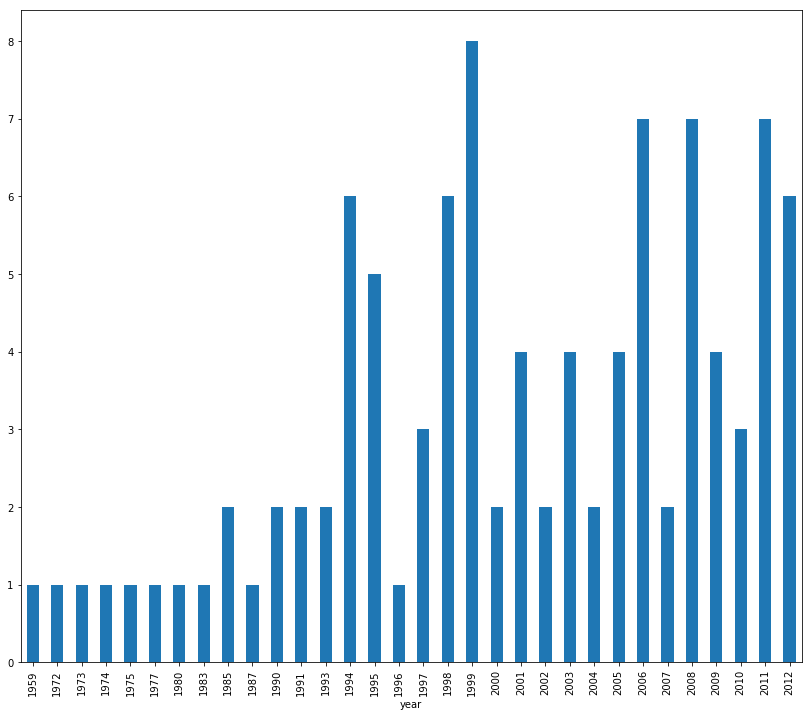

In [13]:
plt.figure(figsize=(14,12))
df.groupby('year').size().plot(kind='bar')

In [14]:
#pivot for average

df.groupby(['year']).mean()

,duration,rating,metascore,votes,gross
year,,,,,
1959,121.000000,8.200000,97.000000,219353.000000,25.000000
1972,175.000000,9.200000,100.000000,1433674.000000,134.970000
1973,129.000000,8.300000,80.000000,218805.000000,159.600000
1974,202.000000,9.000000,90.000000,995839.000000,57.300000
1975,125.000000,8.000000,86.000000,217459.000000,50.000000
1977,121.000000,8.600000,90.000000,1116945.000000,322.740000
1980,124.000000,8.700000,82.000000,1047623.000000,290.480000
1983,131.000000,8.300000,58.000000,858065.000000,309.130000
1985,115.000000,8.150000,74.500000,573565.000000,136.055000


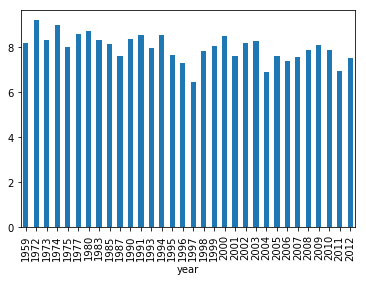

In [15]:
df.groupby('year')['rating'].mean().plot.bar()

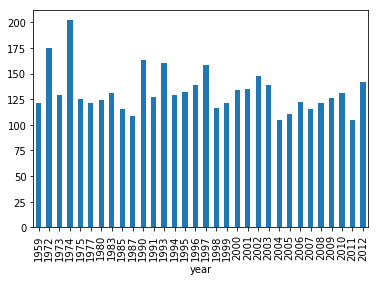

In [16]:
# how about duration over the years?

df.groupby('year')['duration'].mean().plot.bar()

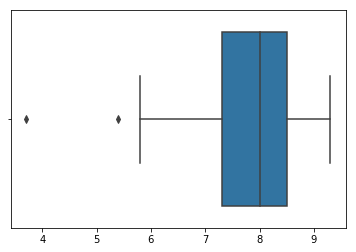

In [17]:
# detect outliers (rating)
sns.boxplot([df.rating])

In [18]:
df.sort_values('rating', ascending=False).head(10)

,title,url,year,duration,rating,metascore,votes,gross
0,'The Shawshank Redemption','/title/tt0111161/',1994,142,9.300000,80.000000,2089035,28.340000
9,'The Godfather','/title/tt0068646/',1972,175,9.200000,100.000000,1433674,134.970000
29,'The Godfather: Part II','/title/tt0071562/',1974,202,9.000000,90.000000,995839,57.300000
1,'The Dark Knight','/title/tt0468569/',2008,152,9.000000,84.000000,2055527,534.860000
4,'Pulp Fiction','/title/tt0110912/',1994,154,8.900000,94.000000,1632929,107.930000
8,'The Lord of the Rings: The Return of the King','/title/tt0167260/',2003,201,8.900000,94.000000,1486945,377.850000
21,"""Schindler's List""",'/title/tt0108052/',1993,195,8.900000,93.000000,1082790,96.070000
6,'The Lord of the Rings: The Fellowship of the ...,'/title/tt0120737/',2001,178,8.800000,92.000000,1502989,315.540000
3,'Fight Club','/title/tt0137523/',1999,139,8.800000,66.000000,1670224,37.030000
2,'Inception','/title/tt1375666/',2010,148,8.800000,74.000000,1830297,292.580000


In [19]:
# what are those outliers?
df.sort_values('rating', ascending=False).tail(10)

,title,url,year,duration,rating,metascore,votes,gross
94,'Saw II','/title/tt0432348/',2005,93,6.600000,40.000000,217162,87.040000
54,'The Village','/title/tt0368447/',2004,108,6.500000,44.000000,227241,114.200000
59,'American Pie 2','/title/tt0252866/',2001,108,6.400000,43.000000,225113,145.100000
99,'The Blair Witch Project','/title/tt0185937/',1999,81,6.400000,81.000000,215860,140.540000
89,'Sucker Punch','/title/tt0978764/',2011,110,6.100000,33.000000,217928,36.390000
93,'I Am Number Four','/title/tt1464540/',2011,111,6.100000,36.000000,217270,55.100000
88,'The Fast and the Furious: Tokyo Drift','/title/tt0463985/',2006,104,6.000000,45.000000,218354,62.510000
60,'Battleship','/title/tt1440129/',2012,131,5.800000,41.000000,224960,65.420000
77,'Batman Forever','/title/tt0112462/',1995,121,5.400000,51.000000,219668,184.030000
90,'Batman & Robin','/title/tt0118688/',1997,125,3.700000,28.000000,217562,107.330000


In [0]:
# detect outliers (gross)


In [0]:
# What are those outliers?



In [20]:
# correlation
df.corr()

,year,duration,rating,metascore,votes,gross
year,1.000000,-0.184043,-0.310353,-0.338725,-0.094216,0.034264
duration,-0.184043,1.000000,0.440278,0.311059,0.531026,0.356203
rating,-0.310353,0.440278,1.000000,0.726519,0.739777,0.246626
metascore,-0.338725,0.311059,0.726519,1.000000,0.509621,0.319727
votes,-0.094216,0.531026,0.739777,0.509621,1.000000,0.481024
gross,0.034264,0.356203,0.246626,0.319727,0.481024,1.000000


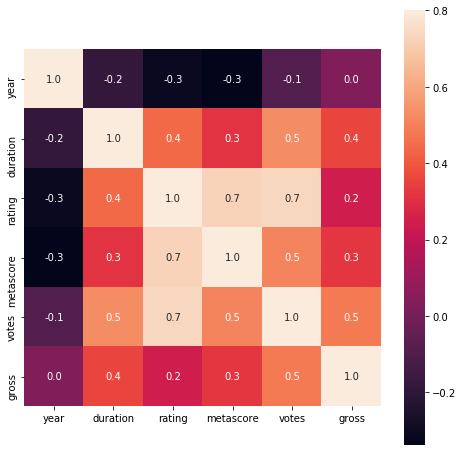

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

# Predictive Analytics: Regression

In [0]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split

In [0]:
# remove missing values
df = df.dropna()

In [0]:
y = df['rating'] 
X = df[['year', 'duration', 'metascore', 'votes', 'gross']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66, 5) (33, 5) (66,) (33,)


In [0]:
# machine learning
model = lm.LinearRegression()
#model.fit(X, y)   
#pred = model.predict(X)

model = model.fit(X_train, y_train)
pred = model.predict(X_test)

Text(0, 0.5, 'Predicted')

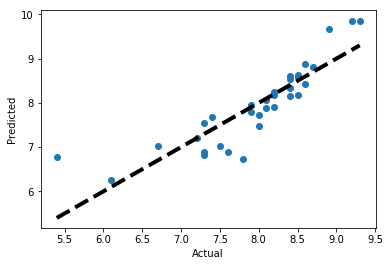

In [55]:
plt.subplots()
#plt.scatter(y, pred)
plt.scatter(y_test, pred)
#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [56]:
import numpy as np
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,year,-0.011074
1,duration,0.000954
2,metascore,0.027905
3,votes,0.000001
4,gross,-0.001178


there is little correlation between gross revenue and rating. What is going on here?

In [58]:
#print("mean square error: ", mean_squared_error(y, pred))
print("mean square error: ", mean_squared_error(y_test, pred))
print("variance or r-squared: ", explained_variance_score(y_test, pred))

mean square error:  0.19914841110599357
variance or r-squared:  0.6960420265216218
